In [1]:
import os, time
from scipy import stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
%matplotlib inline

from IPython.display import display, HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
# Create timestamp to show when this summary was run
print 'Summary run: ' + time.strftime("%a, %d %b %Y %H:%M")

Summary run: Mon, 04 May 2020 17:44


In [3]:
relative_path = '../../../outputs'
pd.options.display.float_format = '{:0,.0f}'.format
format_percent = "{:,.2%}".format

# Traffic Counts
----
### By Facility Type

In [4]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume.csv'))
df[['modeled','observed']] = df[['modeled','observed']].astype('float')

In [5]:
_df = df.groupby('@facilitytype').sum()[['observed','modeled']]
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df

,observed,modeled,diff,percent_diff
@facilitytype,,,,
Freeway,"500,196,894","535,019,732","34,822,838",6.96%
HOV,"1,194,523","1,346,873","152,350",12.75%
Principal Arterial,"11,044,380","14,306,484","3,262,104",29.54%
Ramp,"705,192","666,720","-38,472",-5.46%
Total,"513,140,989","551,339,809","38,198,820",7.44%


----
### By County

In [6]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume_county_facility.csv'))
df[['modeled','observed']] = df[['modeled','observed']].astype('float')

_df = df.groupby('county').sum()[['observed','modeled']]
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df

,observed,modeled,diff,percent_diff
county,,,,
King,"348,341,500","371,310,748","22,969,248",6.59%
Pierce,"99,146,016","109,478,196","10,332,180",10.42%
Snohomish,"65,653,473","70,550,865","4,897,392",7.46%
Total,"513,140,989","551,339,809","38,198,820",7.44%


----
### Scatterplots 

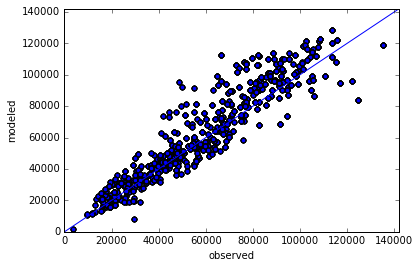

In [7]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume.csv'))
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)

In [8]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print 'r^2: ' + str(r_value)

r^2: 0.926179983274


---
By County

King r^2: 0.922123654375
Pierce r^2: 0.879140889373


Snohomish r^2: 0.970026104525


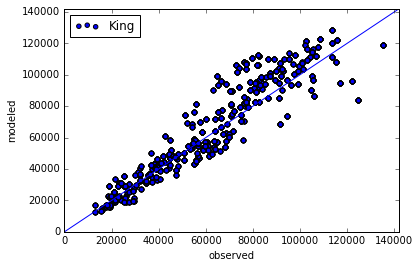

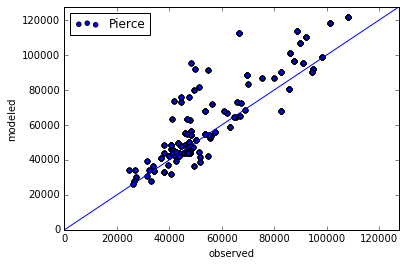

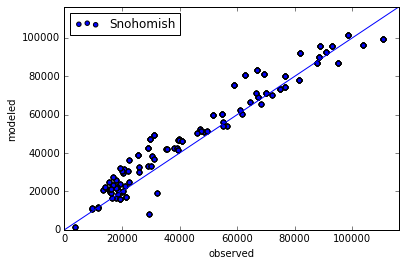

In [9]:
for county in np.unique(df['county']):
    _df = df[df['county'] == county]
    ax = _df.plot(kind='scatter', x='observed', y='modeled', label=county)
    lim = _df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    print str(county) + ' r^2: ' + str(r_value)

---
By Facility Type

r^2 Freeway: 0.911584094283
r^2 Principal Arterial: 0.909717439056


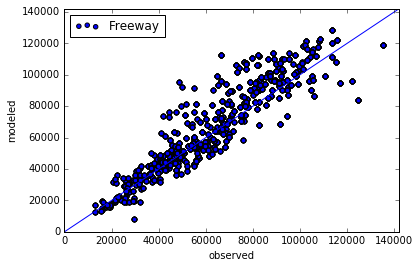

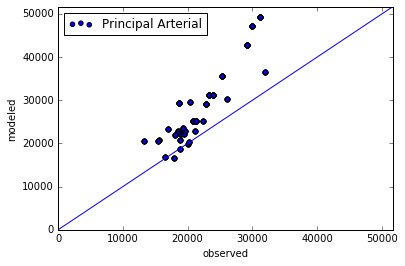

In [10]:
for factype in ['Freeway','Principal Arterial']:
    _df = df[df['@facilitytype'] == factype]
    ax = _df.plot(kind='scatter', x='observed', y='modeled', label=factype)
    lim = _df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
    print 'r^2 ' + str(factype) + ': ' + str(r_value)

# Screenlines

In [11]:
df = pd.read_csv(os.path.join(relative_path,'validation','screenlines.csv'))
df = df.append(df.sum(numeric_only=True), ignore_index=True)
df.at[df.index[-1], 'name'] = 'TOTAL'
#df.at['C', 'name'] = 10
df['percent_diff'] = df['diff']/df['observed']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,name,observed,modeled,diff,percent_diff
0,AUBURN - SOUTH KING,"568,417","608,199","39,782",7.00%
1,KENT,"550,322","493,570","-56,752",-10.31%
2,SEATTLE - SOUTH OF CBD,"526,500","517,474","-9,026",-1.71%
3,SHIP CANAL,"519,802","574,907","55,105",10.60%
4,KIRKLAND-REDMOND,"414,120","434,063","19,943",4.82%
5,MILL CREEK,"400,848","449,412","48,564",12.12%
6,SOUTH BELLEVUE,"399,500","394,805","-4,695",-1.18%
7,SEATTLE - NORTH,"372,000","402,326","30,326",8.15%
8,TACOMA - EAST OF CBD,"312,164","360,826","48,662",15.59%
9,PARKLAND,"304,322","335,912","31,590",10.38%


r^2 : 0.986985581439


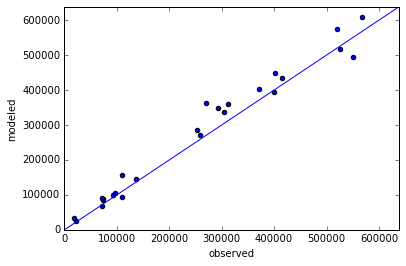

In [12]:
df = df.head(-1)
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print 'r^2 : ' + str(r_value)

# Transit Boarding
----
### By Agency

In [13]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_by_agency.csv')
if len(df) >0:
    df[['observed_5to20','modeled_5to20','diff']] = df[['observed_5to20','modeled_5to20','diff']].astype('float')
    df[['perc_diff']] = df[['perc_diff']].applymap(format_percent)
    df.sort_values('observed_5to20', ascending=False)

----
### Key Routes
#### Ferries

In [14]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_key_routes.csv', index_col='description')
if len(df) >0:
    df[['observed_5to20','modeled_5to20']] = df[['observed_5to20','modeled_5to20']].astype('float')
    _df = df[df['route_code'].isin([5001,5002,5003,5004,5005,5006,5007,1973,1975])].reset_index()
    _df.drop(['route_code','agency'], axis=1, inplace=True)
    _df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)
    _df

In [15]:
if len(df) >0:
    ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20')
    lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
    print 'r^2 ' + str('') + ': ' + str(r_value)

#### Rail

In [16]:
_df = df[df['route_code'].isin([6996,6999,6998])].reset_index()
_df['description'] = _df['route_code'].map({6998: 'Sounder South', 6999: 'Sounder North',6996: 'Link Red Line'})
_df.drop(['route_code','agency'], axis=1, inplace=True)
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)
if len(_df) > 0: 
    _df

In [17]:
if len(_df) > 0: 
    ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20')
    lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
    print 'r^2 ' + str('') + ': ' + str(r_value)

#### RapidRide, Busiest Buses, Streetcar

In [18]:
if len(_df) > 0: 
    _df = df[df['route_code'].isin([1671,1672,1673,1674,1675,1676,6550,1007,1040,1997,1998])].reset_index()
    _df['description'] = _df['route_code'].map({1671: 'A Line RapidRide', 1672: 'B Line RapidRide',
                                                1673: 'C Line RapidRide', 1674: 'D Line RapidRide',
                                                1675: 'E Line RapidRide', 1676: 'F Line RapidRide',
                                                6550: 'Sound Transit 550', 1040: 'KC Metro 40', 1007: 'KC Metro 7',
                                                1997: 'SLU Streetcar', 1998: 'First Hill Streetcar'})
    _df.drop(['route_code','agency'], axis=1, inplace=True)
    _df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)
    _df.sort_values('modeled_5to20', ascending=False)

In [19]:
if len(_df) > 0: 
    ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20')
    lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
    print 'r^2 ' + str('') + ': ' + str(r_value)

---
### Lines by Agency

In [20]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_by_line.csv', index_col='agency')
df = df[-df['agency_id'].isnull()]

for agency in np.unique(df.index):
    _df = df.loc[agency,:]
    ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20', label=agency)
    lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
    print 'r^2 ' + str(agency) + ': ' + str(r_value)

# Light Rail Station Boardings
----
Red Line

In [21]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'light_rail_boardings.csv', index_col='station_name')
df['diff'] = df['modeled_5to20']-df['observed_5to20']
df['percent_diff'] = df['diff']/df['observed_5to20']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,observed_5to20,modeled_5to20,diff,percent_diff
station_name,,,,
Husky Stadium,"9,416","20,686","11,270",119.70%
Westlake,"10,904","24,419","13,515",123.95%
University St,"5,257","24,722","19,465",370.26%
Pioneer Square,"3,865","21,443","17,578",454.81%
Int'l District,"5,647","40,159","34,512",611.10%
Capitol Hill,"7,016","25,271","18,254",260.17%
Stadium,"1,912","4,420","2,507",131.11%
SODO,"2,108","12,724","10,616",503.75%
Beacon Hill,"2,587","4,760","2,172",83.96%


Sound Transit Station Groupings

In [22]:
df_combined = df.copy()

df_combined['station_group'] = df.index
df_combined.loc[['Westlake'],'station_group'] = 'Westlake/University St'
df_combined.loc[['University St'],'station_group'] = 'Westlake/University St'

df_combined.loc[['Pioneer Square'],'station_group'] = "Pioneer Square/Int'l District"
df_combined.loc[["Int'l District"],'station_group'] = "Pioneer Square/Int'l District"

df_combined.loc[['Stadium'],'station_group'] = 'Stadium/SODO'
df_combined.loc[['SODO'],'station_group'] = 'Stadium/SODO'

df_combined.loc[['Beacon Hill'],'station_group'] = 'Beacon Hill/Mount Baker'
df_combined.loc[['Mount Baker'],'station_group'] = 'Beacon Hill/Mount Baker'

df_combined.loc[['Othello'],'station_group'] = 'Othello/Rainier Beach'
df_combined.loc[['Rainier Beach'],'station_group'] = 'Othello/Rainier Beach'

df_combined = df_combined.groupby('station_group').sum()[['observed_5to20','modeled_5to20']]
df_combined['diff'] = df_combined['modeled_5to20']-df_combined['observed_5to20']
df_combined['percent_diff'] = df_combined['diff']/df_combined['observed_5to20']
df_combined[['percent_diff']] = df_combined[['percent_diff']].applymap(format_percent)

df_combined.loc[['Husky Stadium','Capitol Hill','Westlake/University St',"Pioneer Square/Int'l District",
                 'Stadium/SODO','Beacon Hill/Mount Baker','Columbia City','Othello/Rainier Beach',
                "Tukwila Int'l Blvd",'SeaTac/Airport','Angle Lake']]

,observed_5to20,modeled_5to20,diff,percent_diff
station_group,,,,
Husky Stadium,"9,416","20,686","11,270",119.70%
Capitol Hill,"7,016","25,271","18,254",260.17%
Westlake/University St,"16,161","49,141","32,980",204.07%
Pioneer Square/Int'l District,"9,512","61,602","52,090",547.60%
Stadium/SODO,"4,020","17,144","13,124",326.48%
Beacon Hill/Mount Baker,"4,809","11,820","7,010",145.76%
Columbia City,"2,376","3,195",819,34.47%
Othello/Rainier Beach,"4,412","11,331","6,919",156.81%
Tukwila Int'l Blvd,"2,779","6,091","3,312",119.20%


# Stop Transfers

### Light Rail

In [23]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'light_rail_transfers.csv', index_col='station_name')
pd.options.display.float_format = '{:0,.2f}'.format
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,modeled_transfer_rate,observed_transfer_rate,diff,percent_diff
station_name,,,,
Husky Stadium,0.36,-99.00,99.36,-100.37%
Westlake,0.20,0.36,-0.17,-45.39%
University St,0.10,0.20,-0.10,-52.31%
Pioneer Square,0.29,0.16,0.13,80.62%
Int'l District,0.66,0.45,0.21,46.32%
Capitol Hill,0.20,-99.00,99.20,-100.20%
Stadium,0.52,0.12,0.41,340.42%
SODO,0.62,0.31,0.30,97.28%
Beacon Hill,0.53,0.35,0.17,49.15%


# Externals

In [24]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'external_volumes.csv', index_col='location')
pd.options.display.float_format = '{:0,.0f}'.format
df = df.drop('diff', axis=1)
df['diff'] = df['modeled']-df['observed']
df = df.fillna(0)
df.loc['Total',['observed','modeled','diff']] = df[['observed','modeled','diff']].sum()
df['percent_diff'] = df['diff']/df['observed']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)

df[['external_station']] = df[['external_station']].applymap('{:0.0f}'.format)
df.replace('nan', '', regex=True)

,external_station,observed,modeled,diff,percent_diff
location,,,,,
I-5 to Olympia,3733,"130,000","128,652","-1,348",-1.04%
I-5 to Mount Vernon,3744,"67,000","59,404","-7,596",-11.34%
I-90 @ Snoqualmie Pass,3739,"33,000","31,070","-1,930",-5.85%
SR-532 to Camano Island,3746,"23,000","20,102","-2,898",-12.60%
SR-507 to Yelm,3734,"23,000","19,618","-3,382",-14.71%
SR-3 to Belfair,3749,"18,000","16,014","-1,986",-11.03%
Hood Canal Bridge,3748,"18,000","16,481","-1,519",-8.44%
SR-530 N/O Stanwood,3745,"9,100","8,343",-757,-8.32%
Mukilteo-Clinton Ferry,3747,"6,300","5,934",-366,-5.81%


# Corridor Speed

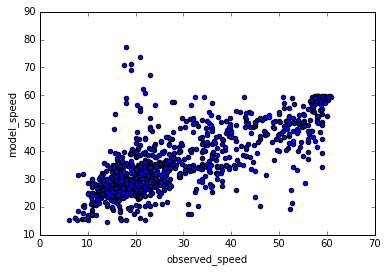

In [25]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'corridor_speeds.csv')
df.plot(kind='scatter', y='model_speed', x='observed_speed')

### AM Peak, Primary Corridors

In [26]:
# Show daily AM and PM peaks by corridor
df[df['tod'] == '7to8'][['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
7,Seattle to Everett - NB,41,58
16,Everett to Seattle - SB,27,28
25,Tacoma to Seattle - NB,29,26
34,Seattle to Tacoma - SB,44,59
43,Bellevue to Lynnwood - NB,46,56
52,Lynnwood to Bellevue - SB,27,24
61,Tukwila to Bellevue - NB,30,19
70,Bellevue to Tukwila - SB,34,44
79,Auburn to Renton - NB,31,24
88,Renton to Auburn - SB,49,55


### PM Peak, Primary Corridors

In [27]:

df[df['tod'] == '16to17'][['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
2,Seattle to Everett - NB,29,24
11,Everett to Seattle - SB,37,28
20,Tacoma to Seattle - NB,42,42
29,Seattle to Tacoma - SB,33,27
38,Bellevue to Lynnwood - NB,30,24
47,Lynnwood to Bellevue - SB,41,41
56,Tukwila to Bellevue - NB,33,32
65,Bellevue to Tukwila - SB,31,20
74,Auburn to Renton - NB,49,44
83,Renton to Auburn - SB,33,32
